In [1]:
import pandas as pd
import warnings

data = pd.read_csv('arima_data.csv',names=['day','price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data['day'] = pd.to_datetime(data['day'], format='%Y-%m-%d')
data.set_index('day',inplace=True)
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


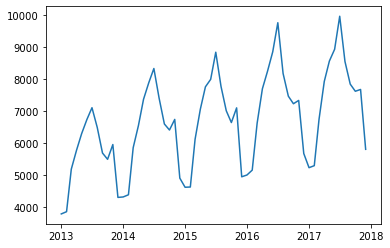

In [5]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['price'])

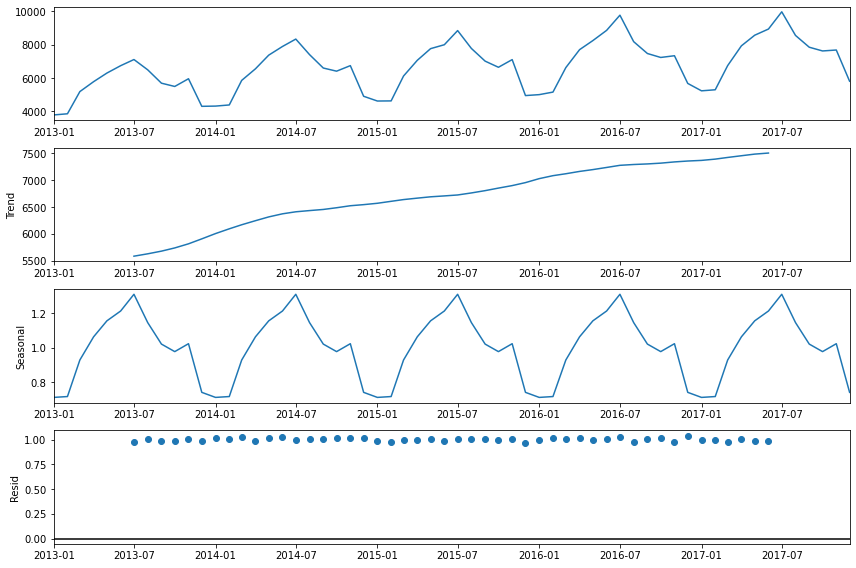

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

training = data[:'2016-12-01']
test = data.drop(training.index)

adf = adfuller(training, regression='ct')
print('ADF Statistic : {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic : -1.9997199341328131
p-value : 0.6015863303793997


<AxesSubplot:xlabel='day'>

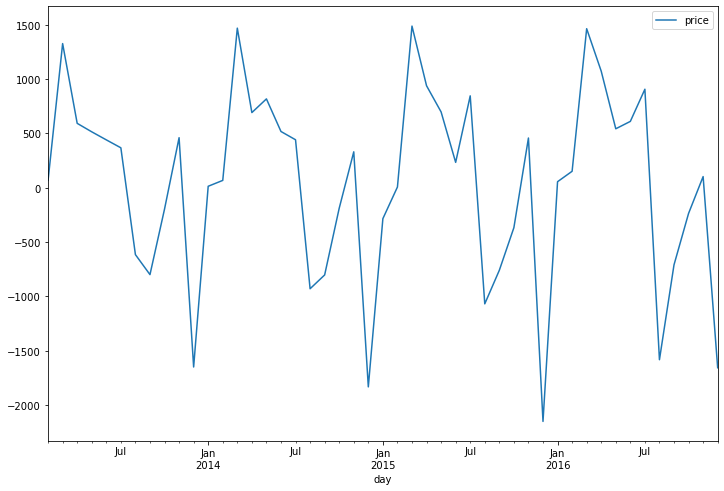

In [14]:
#데이터가 정상성을 갖지 않기 때문에 1차 차분을 통해 정상시계열로 변환
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [15]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -12.094547576926411
p-value : 2.0851606399612174e-22


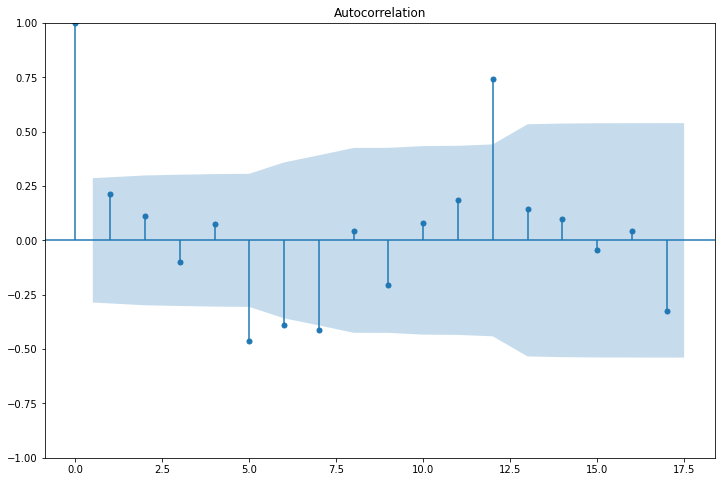

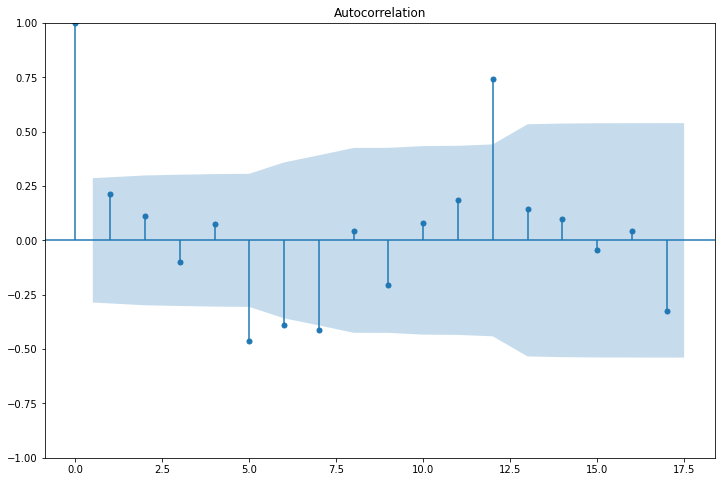

In [16]:
#AR모형의 p값 찾기

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) #AR(p)의 값 확인 가능

c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


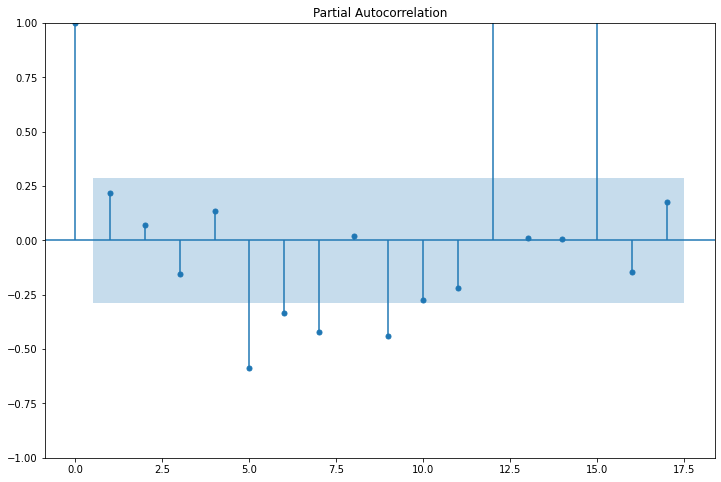

In [17]:
#AR모형의 q값 찾기
plot_pacf(diff_data) #MA(q)의 값 확인 가능

plt.show()

In [19]:
#ARIMA 적용
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2)) 
res = model.fit()
res.summary()

c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\suhye\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Fri, 03 Jun 2022   AIC                            761.750
Time:                        23:12:18   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3165      0.190     -6.924      0.000      -1.689      -0.944
ar.L2         -0.3189      0.191     -1.671      0.095      -0.693       0.055
ma.L1          1.9700      0.243      8.097      0.000       1.493       2.447
ma.L2          0.9949      0.242      4.114      0.000       0.521       1.469
sigma2      4.462e+05   1.13e-06   3.93e+11      0.000    4.46e+05    4.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+27. Standard errors may be unstable.
"""

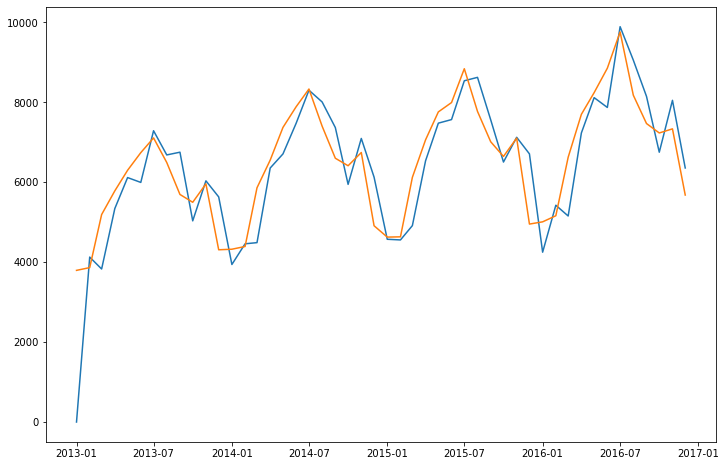

In [20]:
plt.plot(res.predict())
plt.plot(training)

In [21]:
forecast_data = res.forecast(steps = len(test), alpha=0.05)

pred_y = forecast_data
pred_y

2017-01-01    5829.958926
2017-02-01    5507.744964
2017-03-01    5883.485534
2017-04-01    5491.567719
2017-05-01    5887.714431
2017-06-01    5491.158946
2017-07-01    5886.904072
2017-08-01    5492.356139
2017-09-01    5885.586365
2017-10-01    5493.709150
2017-11-01    5884.225305
2017-12-01    5495.069547
Freq: MS, Name: predicted_mean, dtype: float64

In [22]:
test_y = test
test_y

,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


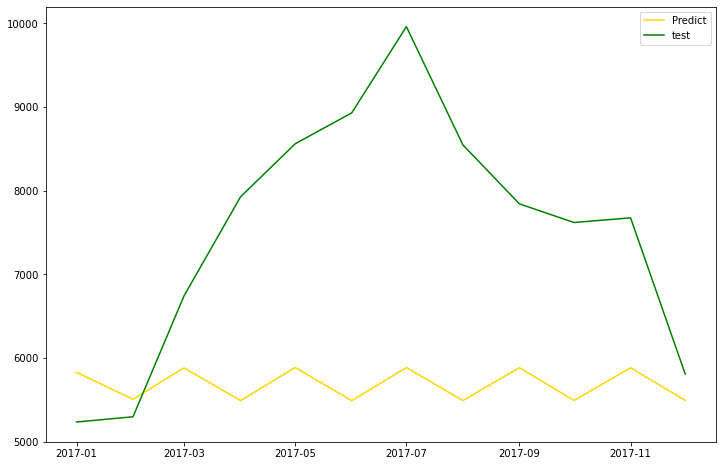

In [23]:
plt.plot(pred_y, color='gold',label = 'Predict')
plt.plot(test_y,color='green',label='test')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('r2 score : ',r2_score(test_y,pred_y))
RMSE = mean_squared_error(test_y, pred_y) ** 0.5
print('RMSE :',RMSE)

r2 score :  -1.6440394214966672
RMSE : 2302.6962527470355


In [25]:
!pip install pmdarima

In [26]:
from pmdarima import auto_arima

In [27]:
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p =3, max_q=3,
                        start_P = 0, start_Q=0,
                        max_P=3, max_Q=3,m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.21 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.12 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.06 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [28]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Fri, 03 Jun 2022   AIC                            480.687
Time:                                     23:55:40   BIC                            483.798
Sample:                                          0   HQIC                           481.761
                                              - 48                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)),
                           index=test.index)
auto_pred_y.columns = ['predict_price']
auto_pred_y

,predict_price
day,
2017-01-01,5609.436976
2017-02-01,5761.436976
2017-03-01,7225.436976
2017-04-01,8298.436976
2017-05-01,8841.436976
2017-06-01,9452.436976
2017-07-01,10359.436976
2017-08-01,8777.436976
2017-09-01,8068.436976


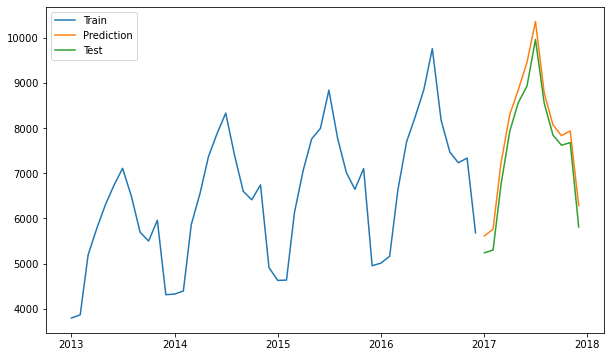

In [30]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train")
plt.plot(auto_pred_y,label='Prediction')
plt.plot(test,label='Test')
plt.legend(loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('r2 score : ',r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y) ** 0.5
print("RMSE : ",RMSE)

r2 score :  0.9305467069431359
RMSE :  373.2064254331493
